In [34]:
import pandas as pd
import os,sys
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(os.path.abspath(parent_path))
from constants import HAWAJEZ,STATUS_WORDS,STATUS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest, chi2
from utils.clean_data import remove_arabic_stop_words,remove_any_numbers
import nltk
from nltk.stem import ISRIStemmer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
# Read the CSV file
df = pd.read_csv("../data/labeld_data_huge_v4.csv")

In [36]:
df.fillna('', inplace=True)

In [37]:

# Apply the cleaning function to the text column
df['full_text'] = df['full_text'].apply(remove_arabic_stop_words)

# Remove || from the text
df['full_text'] = df['full_text'].apply(lambda x: x.replace("|||"," "))

# Remove extra spaces
df['full_text'] = df['full_text'].apply(lambda x: " ".join(x.split()))

# Remove duplicate words in text
def remove_duplicate_in_text(text):
    return " ".join(set(text.split()))

df['full_text'] = df['full_text'].apply(remove_duplicate_in_text)

# Remove any numbers in text
df['full_text'] = df['full_text'].apply(remove_any_numbers)

# Lemmatize Arabic text
def lemmatize_arabic(text):
    stemmer = ISRIStemmer()
    tokens = nltk.word_tokenize(text)
    lemmas = [stemmer.suf32(word) for word in tokens]
    return " ".join(lemmas)

df['full_text'] = df['full_text'].apply(lemmatize_arabic)

In [5]:
# add 10 rows with empoty string 

In [38]:
# get the last 4 columns with the full text and the 4 status
# Select the columns for the first dataframe
status_df = df.iloc[:, -5:]
status_df['full_text'] = df['full_text']
# Select the columns for the second dataframe
hawajez_df = df.iloc[:, :-5]
hawajez_df['full_text'] = df['full_text']


In [39]:
# Split the data into train and test sets
X_train_status, X_test_status, y_train_status, y_test_status = train_test_split(status_df['full_text'], status_df.iloc[:,:-1], test_size=0.2, random_state=12)
# get tfidf for the status model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_status = TfidfVectorizer()

# Fit the vectorizer to the training data for the status model
X_train_status = vectorizer_status.fit_transform(X_train_status)

# Transform the test data using the fitted vectorizer for the status model
X_test_status = vectorizer_status.transform(X_test_status)

In [40]:
import pandas as pd

In [41]:
# convert the y_train and y_test single comlumn
y_train_status = y_train_status.idxmax(axis=1)
y_test_status = y_test_status.idxmax(axis=1)

In [42]:
# Initialize a LinearSVC classifier for the status model
clf_status = LinearSVC(max_iter=10000,verbose=100)

# Train the classifier on the training data for the status model
clf_status.fit(X_train_status, y_train_status)

[LibLinear]

LinearSVC(max_iter=10000, verbose=100)

In [43]:
# Print accuracy on train data for the status model
train_accuracy = clf_status.score(X_train_status, y_train_status)
test_accuracy = clf_status.score(X_test_status, y_test_status)
print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

Train accuracy:  0.9156880265509318
Test accuracy:  0.8998306997742663


In [44]:
# Use the fitted model to make predictions on the test set
y_pred = clf_status.predict(X_test_status)

# Generate classification report
report = classification_report(y_test_status, y_pred, target_names=STATUS_WORDS, output_dict=True)

# Convert report to pandas DataFrame
df_report = pd.DataFrame.from_dict(report).transpose()

# Print the DataFrame
df_report


,precision,recall,f1-score,support
مفتوح,0.871639,0.840084,0.855570,24888.000000
مغلق,0.860292,0.807772,0.833205,6716.000000
ازمة,0.917506,0.914363,0.915931,4087.000000
حذر,0.891824,0.924381,0.907810,9971.000000
no_status,0.931333,0.962450,0.946636,28762.000000
accuracy,0.899831,0.899831,0.899831,0.899831
macro avg,0.894519,0.889810,0.891831,74424.000000
weighted avg,0.898907,0.899831,0.899059,74424.000000


In [45]:
# Split the data into train and test sets
X_train_hawajez, X_test_hawajez, y_train_hawajez, y_test_hawajez = train_test_split(hawajez_df['full_text'], hawajez_df.iloc[:, 1:], test_size=0.2, random_state=12)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_hawajez = TfidfVectorizer()

# Fit the vectorizer to the training data for the status model
X_train_hawajez = vectorizer_hawajez.fit_transform(X_train_hawajez)

# Transform the test data using the fitted vectorizer for the status model
X_test_hawajez = vectorizer_hawajez.transform(X_test_hawajez)

In [46]:
# convert y_train_hawajez to single column 
y_train_hawajez = y_train_hawajez.idxmax(axis=1)
y_test_hawajez = y_test_hawajez.idxmax(axis=1)

In [47]:
# Initialize a LinearSVC classifier for the status model
clf_hawajez = LinearSVC(max_iter=10000,verbose=100)

# Train the classifier on the training data for the status model
clf_hawajez.fit(X_train_hawajez, y_train_hawajez)

[LibLinear]

LinearSVC(max_iter=10000, verbose=100)

In [48]:
# Print accuracy on train data for the status model
train_accuracy = clf_hawajez.score(X_train_hawajez, y_train_hawajez)
test_accuracy = clf_hawajez.score(X_test_hawajez, y_test_hawajez)
print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

Train accuracy:  0.9504118350509922
Test accuracy:  0.9318230678275825


In [49]:

# Use the fitted model to make predictions on the test set
y_pred = clf_hawajez.predict(X_test_hawajez)

# Generate classification report
report = classification_report(y_test_hawajez, y_pred, target_names=HAWAJEZ, output_dict=True)

# Convert report to pandas DataFrame
df_report = pd.DataFrame.from_dict(report).transpose()

# Print the DataFrame
df_report


c:\Users\nasser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nasser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nasser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

,precision,recall,f1-score,support
حوارة,0.942912,0.890297,0.915849,30054.000000
دير شرف,0.913475,0.916074,0.914773,703.000000
صرة,0.827508,0.968861,0.892623,1124.000000
دوار سلمان,0.949646,0.963288,0.956418,1253.000000
بيت فوريك,0.943330,0.972147,0.957522,1113.000000
شافي شمرون,0.935484,0.966667,0.950820,30.000000
الحمرا,0.078947,1.000000,0.146341,3.000000
جيت,0.949525,0.976307,0.962729,2659.000000
عراق بورين,0.948229,0.901554,0.924303,386.000000
يتسهار,0.000000,0.000000,0.000000,1.000000


In [19]:
# create the two model using pipeline trained on the whole data
# create the status model
from sklearn.pipeline import Pipeline
# make function transformers to add the preproccessing steps to the pipeline
from sklearn.preprocessing import FunctionTransformer

In [50]:

def remove_extra_spaces(row):
    # the row is a pd.Series apply the logic in the reutrn to all the rows
    row.apply(lambda x: x.strip())
    return row

    
def remove_three_columns(row):
    row.apply(lambda x: x.replace("|||"," "))
    return row

def remove_duplicate_in_text(row):
    row.apply(lambda x: " ".join(set(x.split())))
    return row



# Lemmatize Arabic text
def lemmatize_arabic(row):
    stemmer = ISRIStemmer()
    row.apply(lambda x: " ".join([stemmer.suf32(word) for word in nltk.word_tokenize(x)]))
    return row

import arabicstopwords.arabicstopwords as stp

def remove_arabic_stop_words(row):
    row.apply(lambda x: " ".join([word for word in x.split() if not stp.is_stop(word)]))
    return row

remove_arabic_stop_words_transformer = FunctionTransformer(remove_arabic_stop_words)
remove_tree_columns_transformer = FunctionTransformer(remove_three_columns)
remove_extra_spaces_transformer = FunctionTransformer(remove_extra_spaces)
remove_duplicate_in_text_transformer = FunctionTransformer(remove_duplicate_in_text)
lemmatize_arabic_transformer = FunctionTransformer(lemmatize_arabic)
status_pipeline = Pipeline([
   ( "remove_arabic_stop_words",remove_arabic_stop_words_transformer),
    ("remove_tree_columns", remove_tree_columns_transformer),
    ("remove_extra_spaces", remove_extra_spaces_transformer),
   ( "remove_duplicate_in_text", remove_duplicate_in_text_transformer),
    ("lemmatize_arabic", lemmatize_arabic_transformer),
    ("tfidf", TfidfVectorizer()),
    ("clf", LinearSVC(max_iter=10000,verbose=100))
],verbose=True)
status_pipeline.fit(df['full_text'], df.iloc[:, -5:].idxmax(axis=1))

[Pipeline]  (step 1 of 7) Processing remove_arabic_stop_words, total=   0.5s
[Pipeline]  (step 2 of 7) Processing remove_tree_columns, total=   0.1s
[Pipeline]  (step 3 of 7) Processing remove_extra_spaces, total=   0.1s
[Pipeline]  (step 4 of 7) Processing remove_duplicate_in_text, total=   0.4s
[Pipeline] .. (step 5 of 7) Processing lemmatize_arabic, total=  14.9s
[Pipeline] ............. (step 6 of 7) Processing tfidf, total=   1.6s
[LibLinear][Pipeline] ............... (step 7 of 7) Processing clf, total=   9.4s


Pipeline(steps=[('remove_arabic_stop_words',
                 FunctionTransformer(func=<function remove_arabic_stop_words at 0x000002070C4E3060>)),
                ('remove_tree_columns',
                 FunctionTransformer(func=<function remove_three_columns at 0x000002070C4E3100>)),
                ('remove_extra_spaces',
                 FunctionTransformer(func=<function remove_extra_spaces at 0x0000020706784680>)),
                ('remove_duplicate_in_text',
                 FunctionTransformer(func=<function remove_duplicate_in_text at 0x000002070C4E00E0>)),
                ('lemmatize_arabic',
                 FunctionTransformer(func=<function lemmatize_arabic at 0x000002070C4E3420>)),
                ('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(max_iter=10000, verbose=100))],
         verbose=True)

In [51]:
# get the accuracy of the status pipeline
status_pipeline.score(df['full_text'], df.iloc[:, -5:].idxmax(axis=1))


0.9153812252093433

In [52]:
# get the full report of the status pipeline
y_pred = status_pipeline.predict(df['full_text'])
report = classification_report(df.iloc[:, -5:].idxmax(axis=1), y_pred, target_names=STATUS_WORDS, output_dict=True)
df_report = pd.DataFrame.from_dict(report).transpose()
df_report

,precision,recall,f1-score,support
مفتوح,0.888249,0.865978,0.876973,124756.000000
مغلق,0.882937,0.834994,0.858296,33223.000000
ازمة,0.936631,0.929158,0.932880,20807.000000
حذر,0.905846,0.940494,0.922845,49491.000000
no_status,0.945105,0.966164,0.955518,143839.000000
accuracy,0.915381,0.915381,0.915381,0.915381
macro avg,0.911754,0.907358,0.909302,372116.000000
weighted avg,0.914798,0.915381,0.914893,372116.000000


[Pipeline]  (step 1 of 7) Processing remove_arabic_stop_words, total=   0.0s
[Pipeline]  (step 2 of 7) Processing remove_tree_columns, total=   0.0s
[Pipeline]  (step 3 of 7) Processing remove_extra_spaces, total=   0.0s
[Pipeline]  (step 4 of 7) Processing remove_duplicate_in_text, total=   0.0s
[Pipeline] .. (step 5 of 7) Processing lemmatize_arabic, total=   1.4s
[Pipeline] ............. (step 6 of 7) Processing tfidf, total=   0.1s
[LibLinear][Pipeline] ............... (step 7 of 7) Processing clf, total=   0.2s
[Pipeline]  (step 1 of 7) Processing remove_arabic_stop_words, total=   0.1s
[Pipeline]  (step 2 of 7) Processing remove_tree_columns, total=   0.0s
[Pipeline]  (step 3 of 7) Processing remove_extra_spaces, total=   0.0s
[Pipeline]  (step 4 of 7) Processing remove_duplicate_in_text, total=   0.1s
[Pipeline] .. (step 5 of 7) Processing lemmatize_arabic, total=   2.5s
[Pipeline] ............. (step 6 of 7) Processing tfidf, total=   0.3s
[LibLinear][Pipeline] ............... 

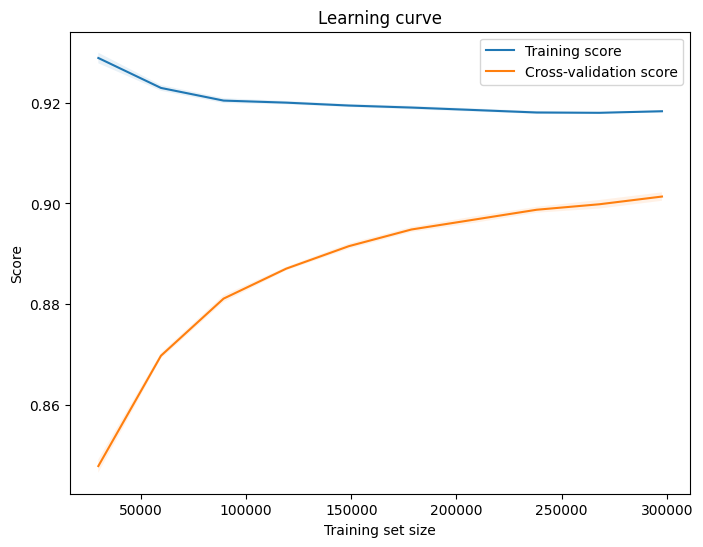

In [24]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# import numpy as np
# # Plot learning curve
# train_sizes, train_scores, test_scores = learning_curve(status_pipeline,df['full_text'], df.iloc[:, -5:].idxmax(axis=1), cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# plt.figure(figsize=(8, 6))
# plt.plot(train_sizes, train_mean, label="Training score")
# plt.plot(train_sizes, test_mean, label="Cross-validation score")
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
# plt.xlabel("Training set size")
# plt.ylabel("Score")
# plt.title("Learning curve")
# plt.legend()
# plt.show()

In [53]:
hawajez_pipeline = Pipeline([
   ( "remove_arabic_stop_words",remove_arabic_stop_words_transformer),
    ("remove_tree_columns", remove_tree_columns_transformer),
    ("remove_extra_spaces", remove_extra_spaces_transformer),
   ( "remove_duplicate_in_text", remove_duplicate_in_text_transformer),
    ("lemmatize_arabic", lemmatize_arabic_transformer),
    ("tfidf", TfidfVectorizer()),
    ("clf", LinearSVC(max_iter=10000,verbose=100))
],verbose=True)
hawajez_pipeline.fit(df['full_text'], df.iloc[:, 1:-5].idxmax(axis=1))


[Pipeline]  (step 1 of 7) Processing remove_arabic_stop_words, total=   0.5s
[Pipeline]  (step 2 of 7) Processing remove_tree_columns, total=   0.1s
[Pipeline]  (step 3 of 7) Processing remove_extra_spaces, total=   0.0s
[Pipeline]  (step 4 of 7) Processing remove_duplicate_in_text, total=   0.5s
[Pipeline] .. (step 5 of 7) Processing lemmatize_arabic, total=  15.7s
[Pipeline] ............. (step 6 of 7) Processing tfidf, total=   1.8s
[LibLinear][Pipeline] ............... (step 7 of 7) Processing clf, total=  23.2s


Pipeline(steps=[('remove_arabic_stop_words',
                 FunctionTransformer(func=<function remove_arabic_stop_words at 0x000002070C4E3060>)),
                ('remove_tree_columns',
                 FunctionTransformer(func=<function remove_three_columns at 0x000002070C4E3100>)),
                ('remove_extra_spaces',
                 FunctionTransformer(func=<function remove_extra_spaces at 0x0000020706784680>)),
                ('remove_duplicate_in_text',
                 FunctionTransformer(func=<function remove_duplicate_in_text at 0x000002070C4E00E0>)),
                ('lemmatize_arabic',
                 FunctionTransformer(func=<function lemmatize_arabic at 0x000002070C4E3420>)),
                ('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(max_iter=10000, verbose=100))],
         verbose=True)

In [54]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# import numpy as np
# # Plot learning curve
# train_sizes, train_scores, test_scores = learning_curve(hawajez_pipeline,df['full_text'], df.iloc[:, -5:].idxmax(axis=1), cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# plt.figure(figsize=(8, 6))
# plt.plot(train_sizes, train_mean, label="Training score")
# plt.plot(train_sizes, test_mean, label="Cross-validation score")
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
# plt.xlabel("Training set size")
# plt.ylabel("Score")
# plt.title("Learning curve")
# plt.legend()
# plt.show()

In [55]:
# get the accuracy of the status pipeline
hawajez_pipeline.score(df['full_text'], df.iloc[:, 1:-5].idxmax(axis=1))


0.9507438540670113

In [56]:
# get the full report of the status pipeline
y_pred = hawajez_pipeline.predict(df['full_text'])
report = classification_report(df.iloc[:, 1:-5].idxmax(axis=1), y_pred, target_names=HAWAJEZ, output_dict=True)
df_report = pd.DataFrame.from_dict(report).transpose()
df_report

,precision,recall,f1-score,support
حوارة,0.961054,0.914666,0.937286,149436.000000
دير شرف,0.945938,0.906085,0.925583,3418.000000
صرة,0.855982,0.984477,0.915744,5669.000000
دوار سلمان,0.961106,0.991779,0.976202,6204.000000
بيت فوريك,0.957617,0.986844,0.972011,5701.000000
شافي شمرون,0.970588,0.988024,0.979228,167.000000
الحمرا,0.076142,1.000000,0.141509,15.000000
جيت,0.973468,0.987600,0.980483,13226.000000
عراق بورين,0.959309,0.907222,0.932539,1897.000000
يتسهار,1.000000,0.500000,0.666667,4.000000


In [58]:
# save the piplines
import pickle
pickle.dump(status_pipeline, open("../models/status_pipeline.pkl", "wb"))
pickle.dump(hawajez_pipeline, open("../models/hawajez_pipeline.pkl", "wb"))

In [64]:
sentance ="حدا شاف شو وضع الشب ال بلغوا عنه مغمى عليه بعد الحاجز "
from utils.generate_data import *
from utils.clean_data import *
from utils.transform_data import *

give_infomation = is_it_give_information(sentance)
talk_about_hajez = is_it_talk_about_hajez(sentance)
is_a_question = is_question_arabic(sentance)
print(give_infomation,talk_about_hajez,is_a_question)
if  is_a_question==0 and give_infomation==1 and talk_about_hajez==1:
    print(sentance)
    # covert the sentance to pd.Series
    sentance = pd.Series(sentance)
    print(status_pipeline.predict(sentance), hawajez_pipeline.predict(sentance))
    print("------")
else:
    sentance = pd.Series(sentance)
    print(sentance)
    print(status_pipeline.predict(sentance), hawajez_pipeline.predict(sentance))
    print("------")
    print(["not_haj1ez"],["no_status"])
    


True False True
0    حدا شاف شو وضع الشب ال بلغوا عنه مغمى عليه بعد...
dtype: object
['مفتوح'] ['شافي شمرون']
------
['not_haj1ez'] ['no_status']
